**Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.**

In [1]:
import numpy as np
import pandas as pd

from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
wine = load_wine()

In [3]:
# Наименование признаков
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
# Размер датасета
wine.data.shape

(178, 13)

In [5]:
wine_df = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                       columns=list(wine['feature_names']) + ['target'])

In [6]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [7]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Разделение на тестовую и обучающую выборки

In [8]:
wine_X_train, wine_X_test, wine_Y_train, wine_Y_test = train_test_split(wine.data, wine.target, 
                                                                       test_size=0.3, random_state=1)

In [9]:
# Размер тестовой выборки
wine_X_test.shape, wine_Y_test.shape

((54, 13), (54,))

In [10]:
# Размер обучающей выборки
wine_X_train.shape, wine_Y_train.shape

((124, 13), (124,))

In [11]:
# 3 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=3)
cl1_1.fit(wine_X_train, wine_Y_train)

target1_1 = cl1_1.predict(wine_X_test)
len(target1_1), target1_1

(54,
 array([0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1,
        2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0,
        0, 0, 0, 0, 0, 0, 1, 2, 2, 0]))

In [12]:
# 5 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=5)
cl1_2.fit(wine_X_train, wine_Y_train)

target1_2 = cl1_2.predict(wine_X_test)
len(target1_2), target1_2

(54,
 array([1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1,
        2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0,
        0, 0, 0, 0, 0, 0, 1, 2, 2, 0]))

Метрики качества классификации

In [13]:
# Accuracy
# wine_Y_test = эталон
# target = предсказанное значение классов

# 3 ближайших
accuracy_score(wine_Y_test, target1_1)

0.7407407407407407

In [14]:
# 5 ближайших
accuracy_score(wine_Y_test, target1_2)

0.7037037037037037

In [15]:
# Confusion Matrix
# Конвертация целевого признака в бинарный

def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает, то 1
    res = [1 if x==target else 0 for x in array]
    return res
bin_wine_Y_test = convert_target_to_binary(wine_Y_test, 2)
bin_target1_1 = convert_target_to_binary(target1_1, 2)
bin_target1_2 = convert_target_to_binary(target1_2, 2)

confusion_matrix(bin_wine_Y_test, bin_target1_1, labels=[0, 1])

array([[36,  6],
       [ 6,  6]], dtype=int64)

In [16]:
tn, fp, fn, tp = confusion_matrix(bin_wine_Y_test, bin_target1_1).ravel()
tn, fp, fn, tp

(36, 6, 6, 6)

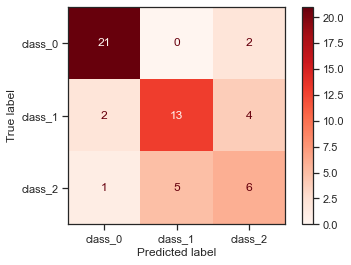

In [17]:
plot_confusion_matrix(cl1_1, wine_X_test, wine_Y_test, 
                      display_labels=wine.target_names, cmap=plt.cm.Reds)

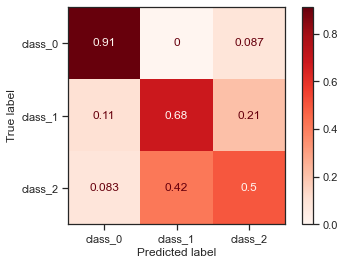

In [18]:
plot_confusion_matrix(cl1_1, wine_X_test, wine_Y_test, 
                      display_labels=wine.target_names, cmap=plt.cm.Reds,
                      normalize='true')

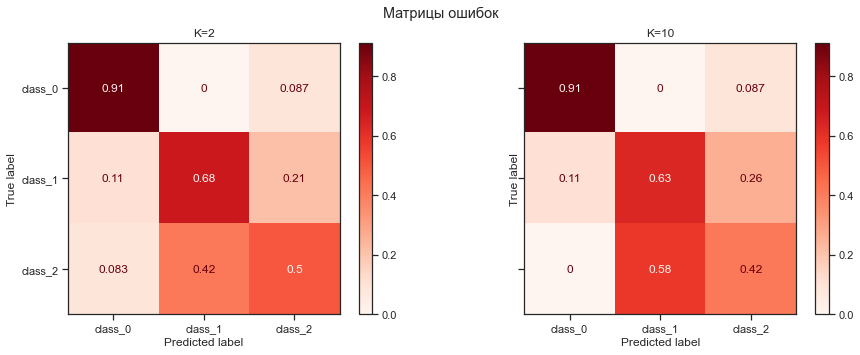

In [20]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))

plot_confusion_matrix(cl1_1, wine_X_test, wine_Y_test,
                      display_labels=wine.target_names,
                      cmap=plt.cm.Reds, normalize='true', ax=ax[0])

plot_confusion_matrix(cl1_2, wine_X_test, wine_Y_test,
                      display_labels=wine.target_names,
                      cmap=plt.cm.Reds, normalize='true', ax=ax[1])

fig.suptitle('Матрицы ошибок')
ax[0].title.set_text('K=2')
ax[1].title.set_text('K=10')

In [21]:
# Precision, recall, F-мера

# 3 ближайших
precision_score(bin_wine_Y_test, bin_target1_1), recall_score(bin_wine_Y_test, bin_target1_1)

(0.5, 0.5)

In [22]:
# 5 ближайших
precision_score(bin_wine_Y_test, bin_target1_2), recall_score(bin_wine_Y_test, bin_target1_2)

(0.4166666666666667, 0.4166666666666667)

In [23]:
precision_score(wine_Y_test, target1_1, average='micro')

0.7407407407407407

In [24]:
# Без учета веса класса
precision_score(wine_Y_test, target1_1, average='macro')

0.6990740740740741

In [25]:
# С учетом веса классов
precision_score(wine_Y_test, target1_1, average='weighted')

0.7379115226337448

In [26]:
classification_report(wine_Y_test, target1_1,
                      target_names=wine.target_names, output_dict=True)

{'class_0': {'precision': 0.875,
  'recall': 0.9130434782608695,
  'f1-score': 0.8936170212765957,
  'support': 23},
 'class_1': {'precision': 0.7222222222222222,
  'recall': 0.6842105263157895,
  'f1-score': 0.7027027027027027,
  'support': 19},
 'class_2': {'precision': 0.5, 'recall': 0.5, 'f1-score': 0.5, 'support': 12},
 'accuracy': 0.7407407407407407,
 'macro avg': {'precision': 0.6990740740740741,
  'recall': 0.6990846681922197,
  'f1-score': 0.6987732413264328,
  'support': 54},
 'weighted avg': {'precision': 0.7379115226337448,
  'recall': 0.7407407407407407,
  'f1-score': 0.7389730155687603,
  'support': 54}}

ROC-кривая и ROC AUC

In [27]:
fpr, tpr, thresholds = roc_curve(bin_wine_Y_test, bin_target1_1,
                                 pos_label=1)
fpr, tpr, thresholds

(array([0.        , 0.14285714, 1.        ]),
 array([0. , 0.5, 1. ]),
 array([2, 1, 0]))

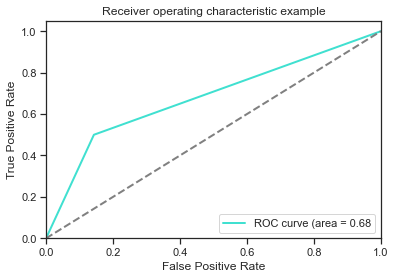

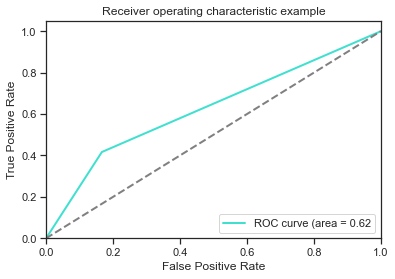

In [28]:
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score,
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='turquoise',
             lw=lw, label='ROC curve (area = %0.2f' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show()
    
# 3 ближайших
draw_roc_curve(bin_wine_Y_test, bin_target1_1, pos_label=1, average='micro')
    
# 5 ближайших
draw_roc_curve(bin_wine_Y_test, bin_target1_2, pos_label=1, average='micro')

In [29]:
wine_cross = cross_val_score(KNeighborsClassifier(n_neighbors=2),
                             wine.data, wine.target, cv=11)
wine_cross

array([0.58823529, 0.64705882, 0.6875    , 0.5625    , 0.5625    ,
       0.625     , 0.8125    , 0.6875    , 0.8125    , 0.75      ,
       0.75      ])

In [30]:
np.mean(wine_cross)

0.68048128342246

In [31]:
wining = {'precision': 'precision_weighted',
          'recall': 'recall_weighted',
          'f1': 'f1_weighted'}

wine_cross = cross_validate(KNeighborsClassifier(n_neighbors=2),
                            wine.data, wine.target, scoring=wining,
                            cv=3, return_train_score=True)
wine_cross

{'fit_time': array([0.00099707, 0.00099826, 0.00099659]),
 'score_time': array([0.00698352, 0.00398874, 0.00398922]),
 'test_precision': array([0.48984127, 0.62317561, 0.70585516]),
 'train_precision': array([0.91000807, 0.8877454 , 0.85825075]),
 'test_recall': array([0.56666667, 0.6440678 , 0.72881356]),
 'train_recall': array([0.89830508, 0.87394958, 0.83193277]),
 'test_f1': array([0.51069094, 0.6198816 , 0.6798559 ]),
 'train_f1': array([0.89415947, 0.8703245 , 0.8181316 ])}

Нахождение наилучшего гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [32]:
n_range = np.array(range(5, 30, 1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
         22, 23, 24, 25, 26, 27, 28, 29])}]

In [33]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters,
                      cv=5, scoring='accuracy')
clf_gs.fit(wine_X_train, wine_Y_train)

Wall time: 252 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [34]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00049868, 0.        , 0.00059838, 0.00059848, 0.00019937,
        0.000598  , 0.00019951, 0.00059834, 0.00019941, 0.00059829,
        0.00019951, 0.00059834, 0.00039897, 0.00039883, 0.00059838,
        0.        , 0.00039887, 0.00039887, 0.00039892, 0.00039897,
        0.00019956, 0.00099735, 0.00079784, 0.        , 0.        ]),
 'std_fit_time': array([6.30977652e-04, 0.00000000e+00, 4.88577726e-04, 4.88655531e-04,
        3.98731232e-04, 4.88266218e-04, 3.99017334e-04, 4.88538730e-04,
        3.98826599e-04, 4.88499796e-04, 3.99017334e-04, 4.88538707e-04,
        4.88636039e-04, 4.88460832e-04, 4.88577633e-04, 0.00000000e+00,
        4.88519238e-04, 4.88519238e-04, 4.88577633e-04, 4.88636039e-04,
        3.99112701e-04, 2.78041453e-07, 3.98921995e-04, 0.00000000e+00,
        0.00000000e+00]),
 'mean_score_time': array([0.00139728, 0.0017951 , 0.00139627, 0.00159588, 0.00159574,
        0.00139647, 0.0017952 , 0.00139632, 0.00119677, 0.00139642,
        0.00

In [35]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

In [36]:
# Лучшее значение метрики
clf_gs.best_score_

0.7500000000000001

In [37]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 22}